# Defining the System

Set up the system. UncertaintyCalc() can take a string representing the function, or a list of strings for multiple functions. Specify input variables using set_input(), providing the variable name (matching the variables in the function string), nominal value, and uncertainty parameters.

In [1]:
%matplotlib inline
import suncal

In [2]:
u = suncal.UncertCalc('J*V')
u.set_input('J', nom=4, unc=.04, k=2)
u.set_input('V', nom=20, unc=.2, k=2)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00   | 0.57            | ± 1.1      | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00   | 0.57            | (78.89 , 81.11 ) | 1.962     | -             |

Alternatively, the inputs and uncertainties can be specified in a list/dictionary and passed in to the UncertaintyCalc().

In [3]:
inputs = [{'name': 'J', 'nom': 4,  'uncerts':[{'name': 'u(J)', 'unc':0.04, 'k':2}]},
          {'name': 'V', 'nom': 20, 'uncerts':[{'name': 'u(V)', 'unc':0.2,  'k':2}]}]
u = suncal.UncertCalc('J*V', inputs=inputs)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00   | 0.57            | ± 1.1      | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00   | 0.57            | (78.89 , 81.11 ) | 1.961     | -             |

If a variable has multiple uncertainty components, each one can be entered using the set_uncert() method.

In [4]:
u = suncal.UncertCalc('J*V')
u.set_input('J', nom=4, unc=.04, k=2)
u.set_input('V', nom=20)
u.set_uncert('V', name='u(typeA)', std=.1, k=2)
u.set_uncert('V', name='u(typeB)', std=.15, k=2)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00   | 0.82            | ± 1.6      | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00   | 0.83            | (78.38 , 81.62 ) | 1.960     | -             |

Measurement units can be specified as strings with the `units` parameter, and conversions will happen automatically. Many unit definitions are recognized (see Python Pint package).

In [5]:
u = suncal.UncertCalc('J*V', units='W')
u.set_input('J', nom=4, unc=.04, k=2, units='ampere')
u.set_input('V', nom=20, units='volt')
u.set_uncert('V', name='u(typeA)', std=100, k=2, units='mV')
u.set_uncert('V', name='u(typeB)', std=150, k=2, units='millivolt')
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.82 W           | ± 1.6 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.82 W           | (78.39 W, 81.62 W) | 1.959     | -             |

# Viewing Results

The calculate() function returns an output report object (uoutput.CalcOutput) which as reporting and plotting functions. The output report is also accessible using the 'out' member of the u object.

In [6]:
out = u.calculate()
out.report_summary()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.82 W           | ± 1.6 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.83 W           | (78.38 W, 81.62 W) | 1.961     | -             |


![IMG0][]





[IMG0]: 

In [7]:
out.report_expanded()

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$f_{1}$   | 99.00%     | 78 W  | 82 W  | 2.576     | inf            | 2.1 W              |
|-          | 95.00%     | 78 W  | 82 W  | 1.960     | inf            | 1.6 W              |
|-          | 90.00%     | 79 W  | 81 W  | 1.645     | inf            | 1.4 W              |
|-          | 68.00%     | 79 W  | 81 W | 0.994     | inf            | 0.82 W             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$f_{1}$   | 99.00%     | 78 W  | 82 W  | 2.574    |
|-          | 95.00%     | 78 W  | 82 W  | 1.961    |
|-          | 90.00%     | 79 W  | 81 W  | 1.645    |
|-          | 68.00%     | 79 W  | 81 W  | 0.993    |

In [8]:
out.report_sens()

|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$J$   | 20.0 V          | 23.53%           | 20.0 W/A         | 23.52%         |
|$V$   | 4.0 A          | 76.47%           | 0.0040 W/mV         | 76.33%         |

## Correlating Inputs

Correlate the inputs by using correlate_vars() to specify coefficients one pair at a time, or using set_correlation() to specify the full correlation matrix. 

In [9]:
u.correlate_vars('J', 'V', -.75)
u.calculate()


|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.50 W           | ± 0.97 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.75 W           | (78.53 W, 81.46 W) | 1.961     | -             |

# Plotting outputs

Use the plot_* functions in the output object histograms and other plots. Note the semicolon suppreses duplicate figures due to the pyplot interface.

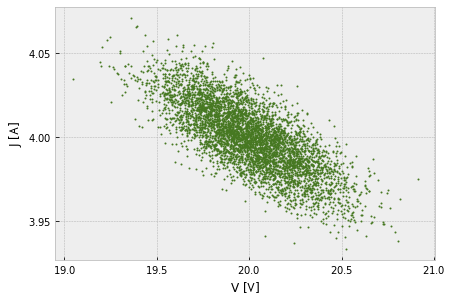

In [10]:
u.out.mc.plot_xscatter(points=5000)

# Full report
The full report, as saved by the GUI, can be shown using u.out.report_all()

In [11]:
u.out.report_all()

## Summary


|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 W  | 0.50 W           | ± 0.97 W     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 W  | 0.75 W           | (78.53 W, 81.46 W) | 1.961     | -             |


![IMG0][]



## Standardized Input Values


|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  |
|----------|---------|------------------|--------------|-------------|
|$J$   | 4.000  | 0.020 A           | inf       |              |
|$V$   | 20  | 180 mV           | inf       |              |



---

## Uncertainty Budget


|Variable   | Component   | Description   | Standard Uncertainty   | Deg. Freedom  |
|----------|-----------|-------------|----------------------|--------------|
|$J$   | -           | --            | 0.020 A               | inf           |
|-          | $u(J)$    | --            | 0.020 A               | inf           |
|$V$   | -           | --            | 180 mV               | inf           |
|-          | $u(typeA)$    | --            | 100 mV               | inf           |
|-          | $u(typeB)$    | --            | 150 mV               | inf           |



---

## Sensitivity Coefficients


|Variable   | GUM Sensitivity   | GUM Proportion   | MC Sensitivity   | MC Proportion  |
|----------|-----------------|----------------|----------------|---------------|
|$J$   | 20.0 V          | 64.69%           | 20.0 W/A         | 28.56%         |
|$V$   | 4.0 A          | 210.24%          | 0.0056 W/mV         | 178.66%        |



---

## Expanded Uncertainties

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$f_{1}$   | 99.00%     | 79 W  | 81 W  | 2.576     | inf            | 1.3 W              |
|-          | 95.00%     | 79 W  | 81 W  | 1.960     | inf            | 0.97 W              |
|-          | 90.00%     | 79 W  | 81 W  | 1.645     | inf            | 0.82 W              |
|-          | 68.00%     | 80 W  | 80 W | 0.994     | inf            | 0.49 W             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$f_{1}$   | 99.00%     | 78 W  | 82 W  | 2.578    |
|-          | 95.00%     | 79 W  | 81 W  | 1.961    |
|-          | 90.00%     | 79 W  | 81 W  | 1.644    |
|-          | 68.00%     | 79 W  | 81 W  | 0.995    |


## GUM Derivation

### Measurement Model:

$f_{1} = J V$

### Input Covariance Matrix:


|-         | $J$  | $V$ |
|---------|---------|---------|
|$J$  | $u_{J}^{2}$  | $\sigma_{JV} u_{J} u_{V}$ |
|$V$  | $\sigma_{JV} u_{J} u_{V}$  | $u_{V}^{2}$ |


### Sensitivity Coefficients:

$\frac{\partial}{\partial J} f_{1} = V$

$\frac{\partial}{\partial V} f_{1} = J$

### Combined Uncertainty:

$u_{f1} = \sqrt{2 \sigma_{JV} u_{J} u_{V} \frac{\partial}{\partial J} f_{1} \frac{\partial}{\partial V} f_{1} + u_{J}^{2} \left(\frac{\partial}{\partial J} f_{1}\right)^{2} + u_{V}^{2} \left(\frac{\partial}{\partial V} f_{1}\right)^{2}}$

$u_{f1} = \sqrt{J u_{V} \left(J u_{V} + V \sigma_{JV} u_{J}\right) + V u_{J} \left(J \sigma_{JV} u_{V} + V u_{J}\right)}$

### Effective degrees of freedom:

$\nu_{f1} = \frac{u_{f1}^{4}}{\frac{J^{4} u_{V}^{4}}{\nu_{V}} + \frac{V^{4} u_{J}^{4}}{\nu_{J}}}$

## GUM Validity

### Comparison to Monte Carlo 95.00% Coverage

2 significant digits. δ = 0.0050 W.


|95.00% Coverage    | Lower Limit                    | Upper Limit                   |
|------------------|------------------------------|------------------------------|
|GUM                | 79.03 W                       | 80.97 W                      |
|MC                 | 78.52 W                       | 81.45 W                      |
|abs(GUM - MC)      | 0.51 W                       | 0.48 W                      |
|abs(GUM - MC) < δ  | <font color="red">FAIL</font>  | <font color="red">FAIL</font> |


## Monte Carlo Inputs

![IMG1][]



## Monte Carlo Convergence

![IMG2][]





[IMG0]: 
[IMG1]: 
[IMG2]: 

# Setup Files

The calculator parameters can be loaded from a saved confiuration file (yaml format).

In [12]:
u = suncal.UncertCalc.from_configfile('../ex_magphase.yaml')
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$mag$   | GUM          | 0.0010   | 0.010            | ± 0.020      | 1.960     | inf           |
|$mag$   | Monte Carlo  | 0.0126   | 0.0066            | (0.0023 , 0.0272 ) | 1.900     | -             |
|$ph$   | GUM          | 0.0 rad  | 10 rad           | ± 20 rad     | 1.960     | inf           |
|$ph$   | Monte Carlo  | -0.0013 rad | 1.7 rad          | (-3.0 rad, 3.0 rad) | 1.699     | -             |

## Integrating Measurement Units

Measurement units can be specified on the measurement model output and each input using the `units` parameter as string names. All units will be converted as appropriate and the result converted to the specified units of the model. Many unit names and prefixes are recognized (see documentation for the Pint package). The pint.UnitRegistry instance can be accessed from `suncal.ureg` for defining other units.

In [13]:
u = suncal.UncertCalc('J*V', units='mW')
u.set_input('J', nom=4, unc=.04, k=2, units='V')
u.set_input('V', nom=20, units='mA')
u.set_uncert('V', name='u(typeA)', std=.1, k=2)
u.set_uncert('V', name='u(typeB)', std=.15, k=2)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80.00 mW  | 0.82 mW           | ± 1.6 mW     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80.00 mW  | 0.83 mW           | (78.39 mW, 81.62 mW) | 1.958     | -             |

In [14]:
# Same thing with output in uW
u = suncal.UncertCalc('J*V', units='microwatts')
u.set_input('J', nom=4, unc=.04, k=2, units='V')
u.set_input('V', nom=20, units='mA')
# Uncertainties are assumed to be in the same units as the input unless specified otherwise
u.set_uncert('V', name='u(typeA)', std=.1)
u.set_uncert('V', name='u(typeB)', std=.15)
u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$f_{1}$   | GUM          | 80000 µW  | 820 µW           | ± 1600 µW     | 1.960     | inf           |
|$f_{1}$   | Monte Carlo  | 80000 µW  | 820 µW           | (78390 µW, 81620 µW) | 1.961     | -             |